In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from itertools import product

from paths import *
from ssd_paths import *
from misc_recorder import *

In [4]:
hyper_dir = model_save_

In [5]:
class ResReader: 
    def __init__(self, dir, runtype="ff", cv="c"):
        self.dir = dir
        self.runtype = runtype
        self.cv = cv
    
    def read(self):
        read_dir = os.path.join(self.dir, self.cv, self.runtype)
        train = ListRecorder(os.path.join(read_dir, 'train.acc'))
        valid = ListRecorder(os.path.join(read_dir, 'valid.acc'))
        fullvalid = ListRecorder(os.path.join(read_dir, 'full_valid.acc'))
        train.read()
        valid.read()
        fullvalid.read()
        return train.get(), valid.get(), fullvalid.get()


def get_reses(dir):
    reses = {}
    for runtype, cv in list(product(["ff", "lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        reses[f"{runtype}-{cv}"] = [x - y for x, y in zip(res[1], res[2])]
    return reses

def draw(reses, dir): 
    plt.figure(figsize=(10, 6))
    for label, data in reses.items():
        plt.plot(data, marker='o', linestyle='-', label=label)

    plt.xlabel('Epoch')
    plt.ylabel('Target-Full Accuracy Difference')
    plt.title('Difference between Target and Full')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(dir, "diff.png"))
    # plt.show()

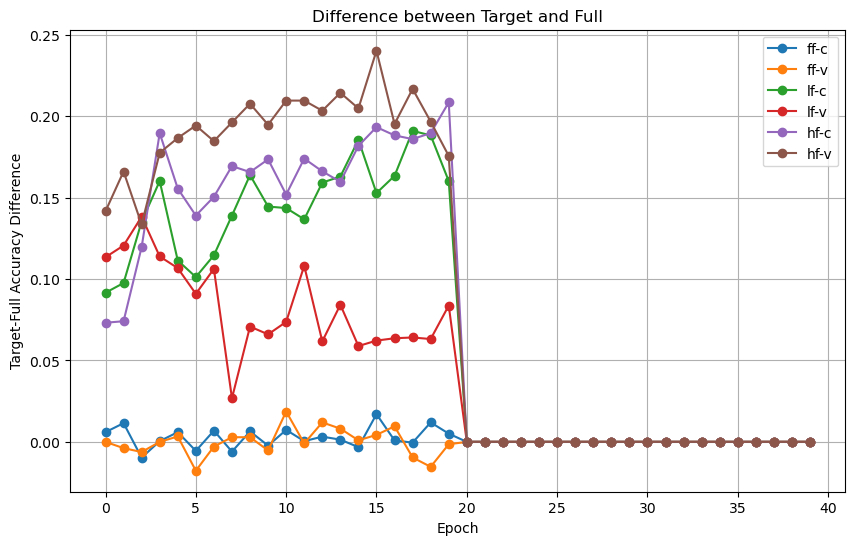

In [6]:
to_read_model_dir = os.path.join(hyper_dir, 'H07-0117001419')
reses = get_reses(to_read_model_dir)
draw(reses, to_read_model_dir)

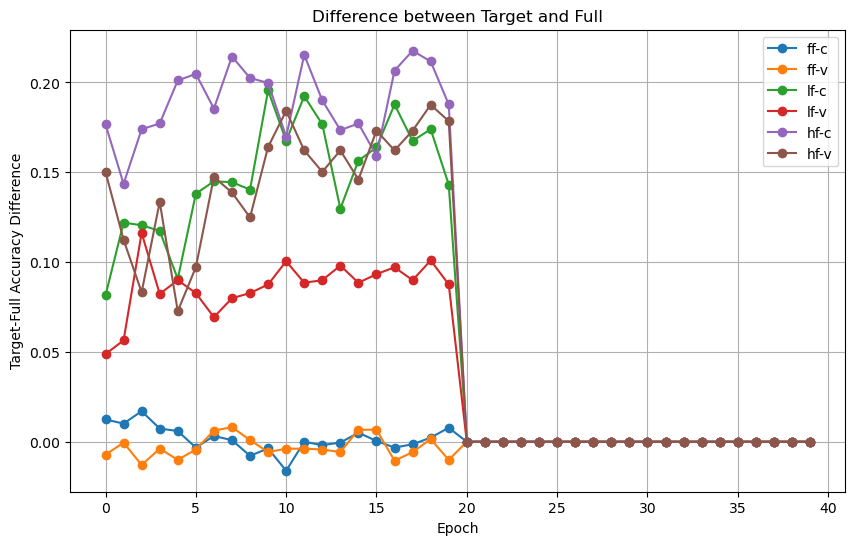

In [7]:
to_read_model_dir = os.path.join(hyper_dir, 'H08-0117000105')
reses = get_reses(to_read_model_dir)
draw(reses, to_read_model_dir)

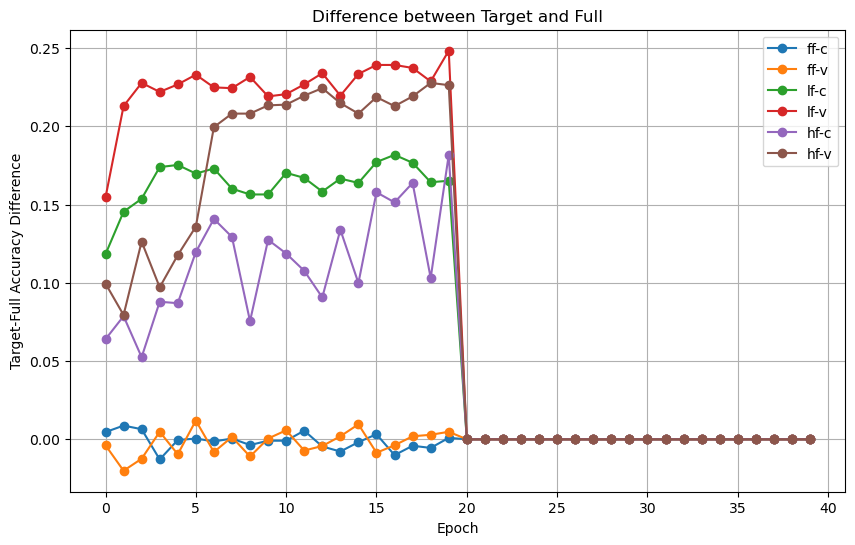

In [8]:
to_read_model_dir = os.path.join(hyper_dir, 'H06-0116233409')
reses = get_reses(to_read_model_dir)
draw(reses, to_read_model_dir)